# Plot results

In [1]:
import numpy as np
import meshplot as mp
import matplotlib.pyplot as plt
import torch
from pyFM.mesh.trimesh import TriMesh
from project.utils import get_rank
from numpy.linalg import eig
%matplotlib inline

def plot_mesh(myMesh,cmap=None):
    mp.plot(myMesh.vertlist, myMesh.facelist,c=cmap)
    
def double_plot(myMesh1,myMesh2,cmap1=None,cmap2=None):
    d = mp.subplot(myMesh1.vertlist, myMesh1.facelist, c=cmap1, s=[2, 2, 0])
    mp.subplot(myMesh2.vertlist, myMesh2.facelist, c=cmap2, s=[2, 2, 1], data=d)

def visu(vertices):
    min_coord,max_coord = np.min(vertices,axis=0,keepdims=True),np.max(vertices,axis=0,keepdims=True)
    cmap = (vertices-min_coord)/(max_coord-min_coord)
    return cmap

def plot_p2p(mesh1, mesh2, p2p):
    cmap1 = visu(mesh1.vertlist); cmap2 = cmap1[p2p]
    double_plot(mesh1,mesh2,cmap1,cmap2)
    

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
save_results_path = "data/eval/test2_standard.pt"
log = torch.load(save_results_path)

In [3]:
comb = 5
res = log[comb]

- res[0]: name of full shape (shape 1)
- res[1]: name of partial shape (shape 2)
- res[2]: predicted C1 (functional map from shape 1 to shape 2)
- res[3]: predicted C2 (functional map from shape 2 to shape 1)
- res[4]: ground truth C1
- res[5]: ground truth C2
- res[6]: ground truth partiality mask 1
- res[7]: ground truth partiality mask 2
- res[8]: predicted point-to-point map  (from partial to full shape)
- res[9]: ground truth point-to-point map  
- res[10]: eigenvalues of LBO on first shape
- res[11]: eigenvalues of LBO on second shape

# Calculate losses 

In [ ]:
comb = 5
res = log[comb]
C1_pred = res[2]
C2_pred = res[3]
C1_gt = res[4]
C2_gt = res[5]
evals1 = res[10]
evals2 = res[11]

In [ ]:
r = get_rank(evals1, evals2)
I_r = torch.eye(len(evals1))
for i in range(r,len(evals1)):
    I_r[i,i] = 0
r
torch.sum((C1_gt @ C1_gt.t()- I_r) ** 2, axis=(0, 1))
torch.sum((C1_pred @ C1_pred.t()- I_r) ** 2, axis=(0, 1))
torch.sum((C1_gt @ C2_gt- I_r) ** 2, axis=(0, 1))
torch.sum((C1_pred @ C2_pred- I_r) ** 2, axis=(0, 1))
torch.sum((C2_gt.t() @ C2_gt- I_r) ** 2, axis=(0, 1))

# Visualization via heatmaps

In [4]:
comb = 5
res = log[comb]
C1_pred = res[2]
C2_pred = res[3]
C1_gt = res[4]
C2_gt = res[5]

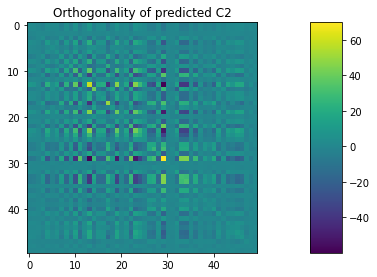

In [5]:
plt.plot()
plt.imshow( C2_pred.t() @ C2_pred)
plt.title('Orthogonality of predicted C2')

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
 
plt.show()

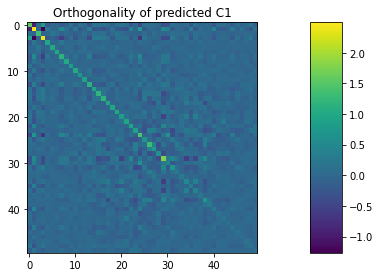

In [6]:
plt.plot()
plt.imshow( C1_pred @ C1_pred.t())
plt.title('Orthogonality of predicted C1')

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
 
plt.show()

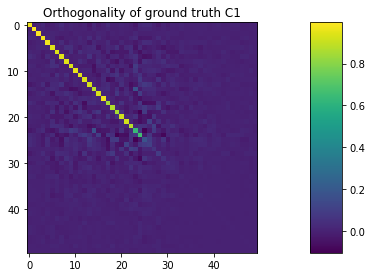

In [7]:
plt.plot()
plt.imshow( C1_gt @ C1_gt.t())
plt.title('Orthogonality of ground truth C1')

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
 
plt.show()

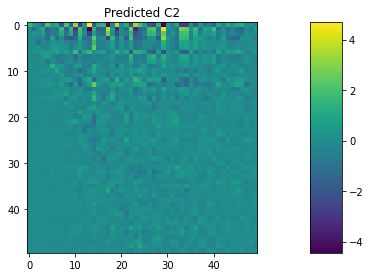

In [8]:
plt.plot()
plt.imshow(C2_pred)
plt.title('Predicted C2')

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
 
plt.show()

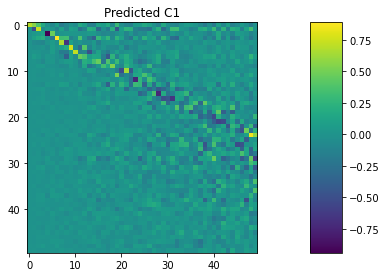

In [9]:
plt.plot()
plt.imshow(C1_pred)
plt.title('Predicted C1')

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
 
plt.show()

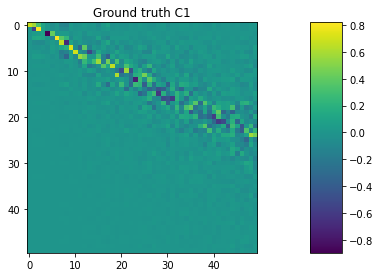

In [10]:
plt.plot()
plt.imshow(C1_gt)
plt.title('Ground truth C1')

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
 
plt.show()

# Plot eigenvalues of C1 and C2

In [ ]:
eigval1, _ = np.linalg.eig(C1_pred)
eigval2, _ = np.linalg.eig(C2_pred)
x = range(1,len(eigval1[::2])+1)
# y-axis values 
y = np.real(eigval1[::2]) # np.abs(eigval1[::2])
z = np.real(eigval2[::2]) # np.abs(eigval2[::2])
# plotting points as a scatter plot 
plt.scatter(x, y, label= "C1", color= "green", s=30) 
plt.scatter(x, z, label= "C2", color= "blue", s=30)  
# x-axis label 
plt.xlabel('number of eigenvalue') 
# frequency label 
plt.ylabel('real value') 
# plot title 
plt.title('Real value of eigenvalues of C1 and C2') 
# showing legend 
plt.legend() 
  
# function to show the plot 
plt.show() 

# Further stuff

In [ ]:
a = np.empty(len(log))
b = np.empty(len(log))
for i in range(len(log)):
    res = log[i]
    evals1 = res[10]
    evals2 = res[11]
    C2_pred = res[3]
    r = get_rank(evals1, evals2)
    for j in range(r,len(evals1)):
        I_r[j,j] = 0
    a[i] = r
    b[i] = torch.sum((C2_pred.t() @ C2_pred- I_r) ** 2, axis=(0, 1))
a, b = (list(x) for x in zip(*sorted(zip(a, b))))

In [ ]:
x = range(len(a))
# y-axis values 
y = a
# plotting points as a scatter plot 
plt.scatter(x, y, color= "green", s=30) 
# x-axis label 
  
# function to show the plot 
plt.show() 

In [ ]:
x = range(len(b))
# y-axis values 
y = b

# Initialize layout

fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(x, y, color= "green", s=30)

# Set logarithmic scale on the y variable
ax.set_yscale("log");